# Neuronale Netze 3

# Lernen im Neuronalen Netz

Gewichtsvektor am Ende des Trainings:
[-1.  1.  1.]
Auswertung am Ende des Trainings:
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


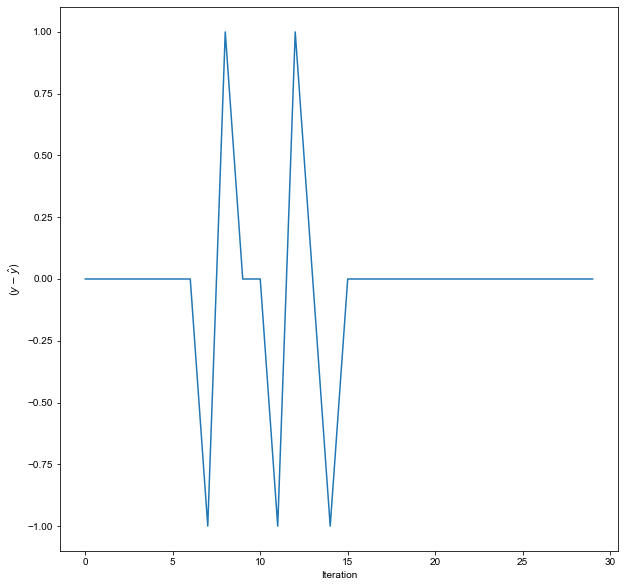

In [12]:
# Plot
import matplotlib.pyplot as plt
# Zufallszahlen Generator
from random import choice
# Für die mathematischen Operationen
from numpy import array, dot, zeros, random
# Ganz wichtig, sonst wird der Plot nicht angezeigt
%matplotlib inline

# Die heaviside Stufenfunktion als Lambda Funktion
heaviside = lambda x: 0 if x < 0 else 1

# Training
def fit(iterations, training_data_set,w):
    """ Lernen im Perceptron
    iterations: Ein Vorwärts- und Rückwärtslauf aller Trainingsbeispiele
    trainings_data_set: Die Trainingsbeispiele
    w: Die Gewichte zum Starten
    """
    errors = []
    weights = []
    for i in range(iterations):
        # zufällige Auswahl eines Trainingsbeispiels random.choice
        training_data = choice(training_data_set)
        x = training_data[0]
        y = training_data[1]
        # Den errechneten Output ermitteln: Gewichtete Summe mit
        # nachgelagerter Stufenfunktion
        y_hat = heaviside(dot(w, x))
        # Fehler berechnen als Differenz zwischen gewünschtem und
        # aktuellem Output
        error = y - y_hat
        # Fehler sammeln für die Ausgabe
        errors.append(error)
        # Gewichte sammeln für spätere Ausgabe
        weights.append(w)
        # Gewichtsanpassung = Das Lernen… x_i ist entweder 0 oder 1
        w += error * x
        # Rückgabe der Fehler und Gewichte
    return errors, weights

def main():
    """ Hauptprogramm
    Hier werden die einzelnen Bausteine zusammengesetzt
    """
    # Trainingsdaten
    # Pro Zeile: die binären Inputdaten und die gewünschte binäre Ausgabe
    # in einer Liste von Tupeln.
    # An der Indexposition 0 des Inputvektors ist das Bias Neuron
    training_data_set = [
        (array([1,0,0]), 0),
        (array([1,0,1]), 1),
        (array([1,1,0]), 1),
        (array([1,1,1]), 1),
    ]

    # Anfangsinitialisierung des Zufallgenerators wegen
    # Reproduzierbarkeit der Ergebnisse
    random.seed( 12 ) # irgendein Wert

    # Array von Länge 3 mit 0 initialisieren
    w = zeros(3)
    # Die Anzahl der Durchläufe. Erfahrungswert durch Probieren
    iterations = 30

    # Trainieren mit fit()
    # Wir sammeln die Fehler/Gewichte in jedem Schritt für die grafische Ausgabe
    errors, weights = fit(iterations, training_data_set,w)
    # Den letzten Gewichtsvektor ausgeben
    w = weights[iterations-1]
    print("Gewichtsvektor am Ende des Trainings:")
    print(w)

    # Auswertung nach dem Trainieren
    print("Auswertung am Ende des Trainings:")
    for x, y in training_data_set:
        y_hat = heaviside(dot(x, w))
        print("{}: {} -> {}".format(x, y, y_hat))

    # Grafik für Fehler pro Lernbeispiel :-)
    # Figure Nummern Start
    fignr = 1
    # Druckgröße in inch
    plt.figure(fignr,figsize=(10,10))
    # Ausgabe Fehler als Plot
    plt.plot(errors)
    # Raster
    plt.style.use('seaborn-whitegrid')
    # Labels
    plt.xlabel('Iteration')
    # Label der y-Achse mit Hilfe von LaTex
    plt.ylabel(r"$(y - \hat y)$")
    # Plot anzeigen
    plt.show()

# Hauptprogramm
main()